In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Download the data from Yahoo Finance using yfinance.
data = yf.download("BTC-USD", start="2022-01-01", end="2023-04-15")



[*********************100%***********************]  1 of 1 completed


/Users/michaelinal/PycharmProjects/pythonProject2/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


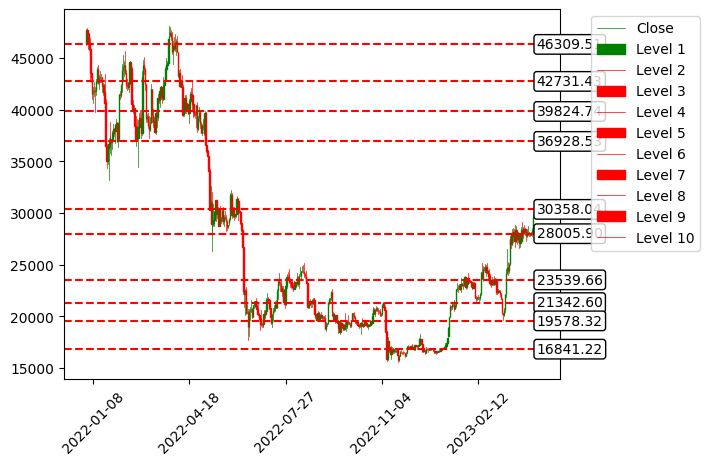

In [2]:
# Create a single list of high and low values.
high_low = np.concatenate([data["High"].values, data["Low"].values])

# Calculate the support and resistance levels using the K-means clustering algorithm.
kmeans = KMeans(n_clusters=10)
kmeans.fit(high_low.reshape(-1, 1))
levels = kmeans.cluster_centers_.flatten()

# Convert the dates to their numerical representation and add them to a new column.
data["NumDate"] = data.index.map(mdates.date2num)

# Plot the data and the support and resistance levels.
fig, ax = plt.subplots()
candlestick_ohlc(ax, data.reset_index()[["NumDate", "Open", "High", "Low", "Close"]].values, width=0.6, colorup="green", colordown="red")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
for level in levels:
    plt.axhline(y=level, color="red", linestyle="--")
    plt.text(data["NumDate"].iloc[-1], level, f"{level:.2f}", va="center", ha="left", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.2"))
plt.legend(["Close"] + [f"Level {i+1}" for i in range(len(levels))], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()

In [3]:
# Download the data from Yahoo Finance using yfinance.
data = yf.download("ETH-USD", start="2022-01-01", end="2023-04-15")



[*********************100%***********************]  1 of 1 completed


/Users/michaelinal/PycharmProjects/pythonProject2/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


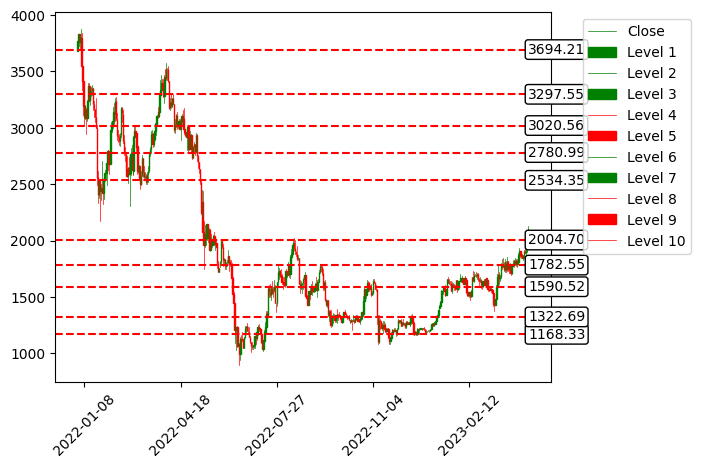

In [4]:
# Create a single list of high and low values.
high_low = np.concatenate([data["High"].values, data["Low"].values])

# Calculate the support and resistance levels using the K-means clustering algorithm.
kmeans = KMeans(n_clusters=10)
kmeans.fit(high_low.reshape(-1, 1))
levels = kmeans.cluster_centers_.flatten()

# Convert the dates to their numerical representation and add them to a new column.
data["NumDate"] = data.index.map(mdates.date2num)

# Plot the data and the support and resistance levels.
fig, ax = plt.subplots()
candlestick_ohlc(ax, data.reset_index()[["NumDate", "Open", "High", "Low", "Close"]].values, width=0.6, colorup="green", colordown="red")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
for level in levels:
    plt.axhline(y=level, color="red", linestyle="--")
    plt.text(data["NumDate"].iloc[-1], level, f"{level:.2f}", va="center", ha="left", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.2"))
plt.legend(["Close"] + [f"Level {i+1}" for i in range(len(levels))], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()